In [8]:
from helper_functions import *

### 3-class

Parsing cross-validation results...
Successfully parsed 45 configurations

=== ABSOLUTE BEST PERFORMERS ===
--------------------------------------------------
Best Accuracy: 3s_0.8 + RF
  Value: 0.5853 ± 0.0427

Best Precision: 5s_0.5 + XGB
  Value: 0.5851 ± 0.0880

Best Recall: 5s_0.5 + XGB
  Value: 0.5541 ± 0.0642

Best F1: 5s_0.5 + XGB
  Value: 0.5396 ± 0.0900

=== TOP 8 CONFIGURATIONS BY F1_MEAN ===
--------------------------------------------------------------------------------
 1. 5s_0.5 + XGB
    F1:       0.5396 ± 0.0900 (95% CI: >0.3596)
    Accuracy: 0.5847 ± 0.0933
    Recall:   0.5541 ± 0.0642

 2. 2s_0.5 + XGB
    F1:       0.5272 ± 0.0607 (95% CI: >0.4058)
    Accuracy: 0.5845 ± 0.0613
    Recall:   0.5324 ± 0.0507

 3. 2s + RF
    F1:       0.5202 ± 0.0594 (95% CI: >0.4014)
    Accuracy: 0.5758 ± 0.0723
    Recall:   0.5352 ± 0.0608

 4. 5s_0.5 + RF
    F1:       0.5178 ± 0.0691 (95% CI: >0.3796)
    Accuracy: 0.5635 ± 0.0832
    Recall:   0.5406 ± 0.0461

 5. 2s_0.5 + R

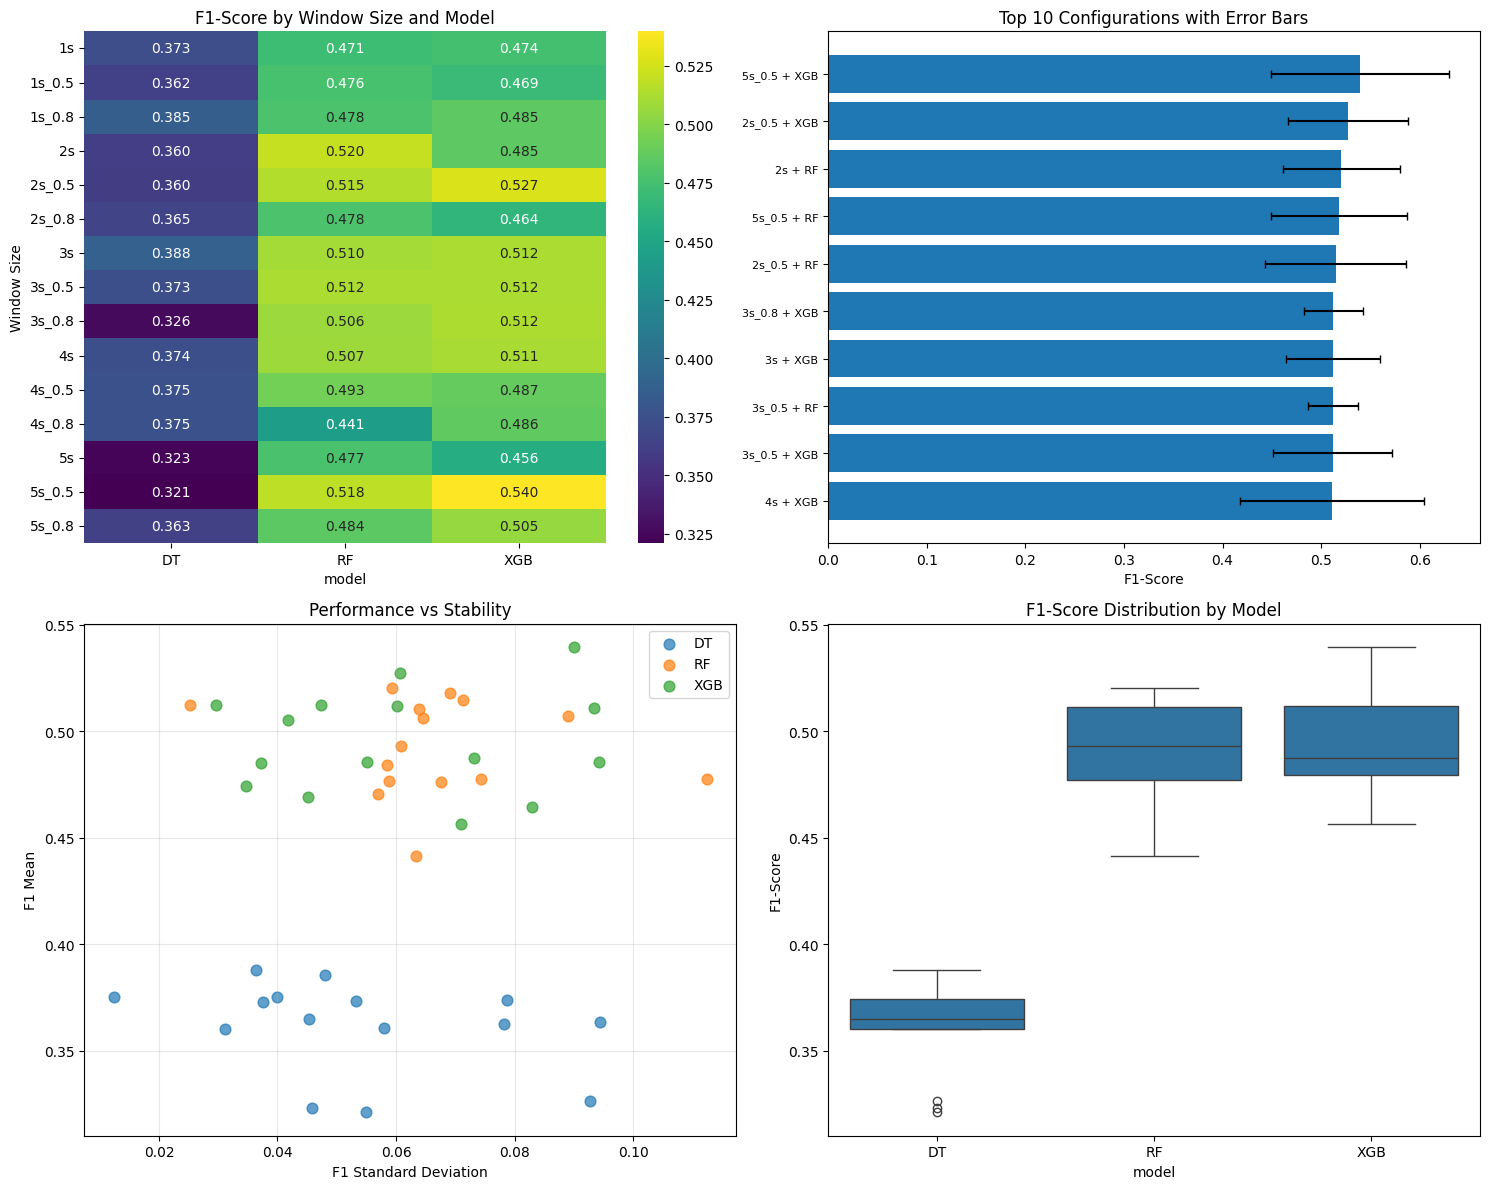

(   window_size model  accuracy_mean  accuracy_std  precision_mean  \
 0           1s    DT         0.4555        0.0400          0.3586   
 1           1s    RF         0.5338        0.0494          0.5598   
 2           1s   XGB         0.5376        0.0496          0.5384   
 3       1s_0.5    DT         0.4838        0.0920          0.4158   
 4       1s_0.5    RF         0.5585        0.0983          0.5484   
 5       1s_0.5   XGB         0.5458        0.0825          0.5242   
 6       1s_0.8    DT         0.4892        0.0960          0.3667   
 7       1s_0.8    RF         0.5383        0.1151          0.5274   
 8       1s_0.8   XGB         0.5420        0.0862          0.5147   
 9           2s    DT         0.4916        0.0641          0.3276   
 10          2s    RF         0.5758        0.0723          0.5624   
 11          2s   XGB         0.5589        0.0433          0.5300   
 12      2s_0.5    DT         0.4932        0.0351          0.3241   
 13      2s_0.5    R

In [9]:
file_path = "/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/configuration_selection/3-class nested cross-validation.csv"
comprehensive_analysis(file_path, primary_metric='f1_mean')

### 2-class

Parsing cross-validation results...
Successfully parsed 45 configurations

=== ABSOLUTE BEST PERFORMERS ===
--------------------------------------------------
Best Accuracy: 3s + XGB
  Value: 0.7325 ± 0.0295

Best Precision: 3s + XGB
  Value: 0.7241 ± 0.0467

Best Recall: 5s_0.8 + RF
  Value: 0.7279 ± 0.0683

Best F1: 3s + RF
  Value: 0.7202 ± 0.0410

=== TOP 8 CONFIGURATIONS BY F1_MEAN ===
--------------------------------------------------------------------------------
 1. 3s + RF
    F1:       0.7202 ± 0.0410 (95% CI: >0.6382)
    Accuracy: 0.7294 ± 0.0320
    Recall:   0.7241 ± 0.0425

 2. 5s_0.8 + RF
    F1:       0.7183 ± 0.0653 (95% CI: >0.5877)
    Accuracy: 0.7220 ± 0.0672
    Recall:   0.7279 ± 0.0683

 3. 3s + XGB
    F1:       0.7181 ± 0.0430 (95% CI: >0.6321)
    Accuracy: 0.7325 ± 0.0295
    Recall:   0.7187 ± 0.0439

 4. 5s_0.5 + XGB
    F1:       0.7098 ± 0.0298 (95% CI: >0.6502)
    Accuracy: 0.7215 ± 0.0352
    Recall:   0.7118 ± 0.0275

 5. 4s_0.8 + RF
    F1:       0

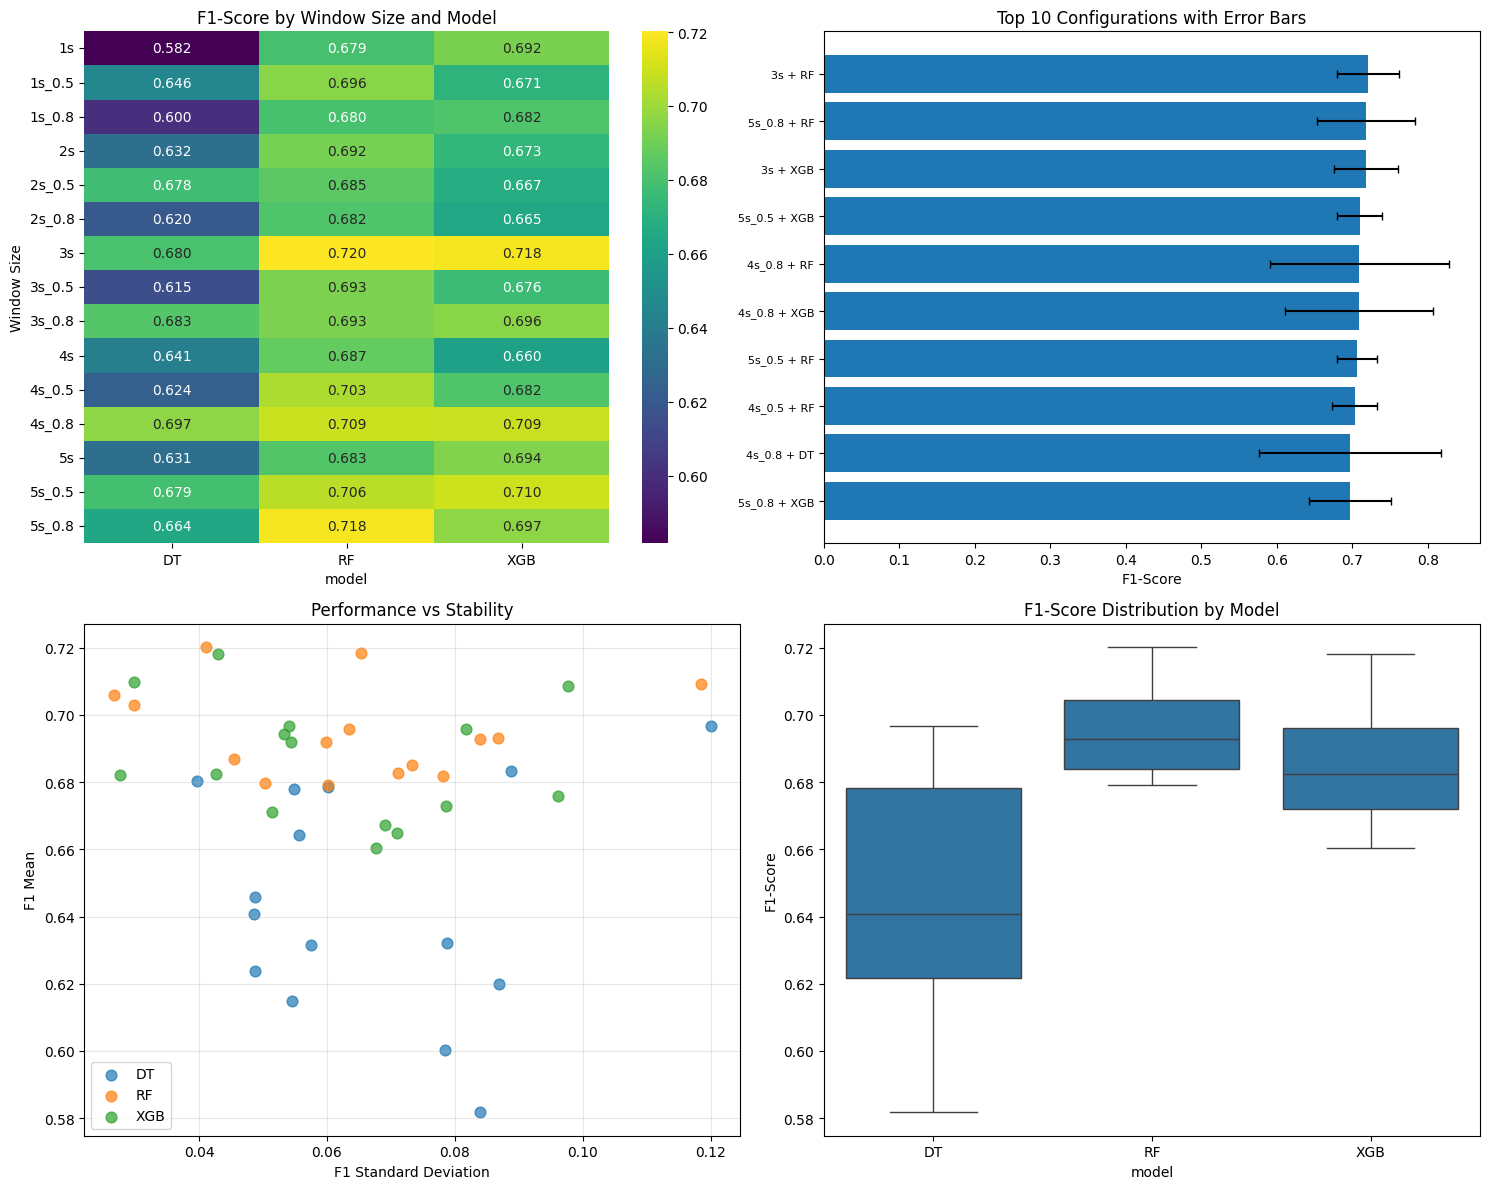

(   window_size model  accuracy_mean  accuracy_std  precision_mean  \
 0           1s    DT         0.6430        0.0532          0.6530   
 1           1s    RF         0.6960        0.0643          0.6902   
 2           1s   XGB         0.7100        0.0567          0.7026   
 3       1s_0.5    DT         0.6637        0.0563          0.6520   
 4       1s_0.5    RF         0.7044        0.0634          0.7015   
 5       1s_0.5   XGB         0.6861        0.0569          0.6791   
 6       1s_0.8    DT         0.6359        0.0653          0.6283   
 7       1s_0.8    RF         0.6906        0.0537          0.6885   
 8       1s_0.8   XGB         0.6989        0.0431          0.6982   
 9           2s    DT         0.6591        0.0496          0.6768   
 10          2s    RF         0.6999        0.0657          0.6961   
 11          2s   XGB         0.6874        0.0809          0.6828   
 12      2s_0.5    DT         0.6823        0.0564          0.6880   
 13      2s_0.5    R

In [10]:
file_path = "/home/edumaba/Public/MPhil_Thesis/Code/wear_uropatch/configuration_selection/2-class nested cross-validation.csv"
comprehensive_analysis(file_path, primary_metric='f1_mean')